In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import seaborn as sns
import matplotlib as mpl
import scipy.stats as stats


/root/filipch/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
df = pd.read_csv('Airline_data.csv',index_col=0)


In [24]:
df.describe()

,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
count,10.000000,10.000000,10.000000
mean,23.800000,691.900000,5715.800000
std,4.709329,252.389228,1117.767795
min,16.000000,223.000000,3863.000000
25%,21.250000,570.500000,5140.500000
50%,23.000000,759.000000,5845.500000
75%,25.750000,812.750000,6175.500000
max,31.000000,1066.000000,7433.000000


In [25]:
df.head()


,Fatal accidents,Passenger deaths,Miles flown [100 mln miles]
Year,,,
1976,24,734,3863.0
1977,25,516,4300.0
1978,31,754,5027.0
1979,31,877,5481.0
1980,22,814,5814.0


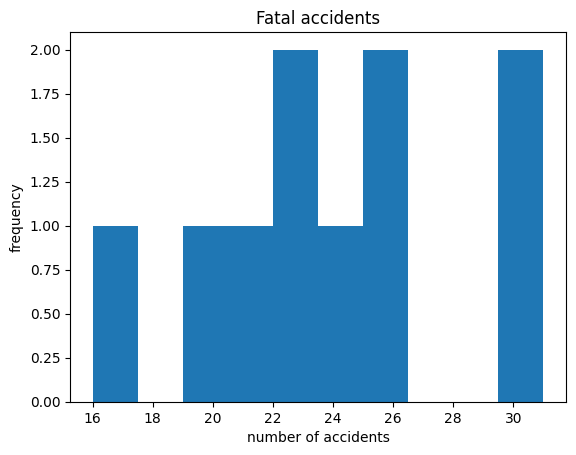

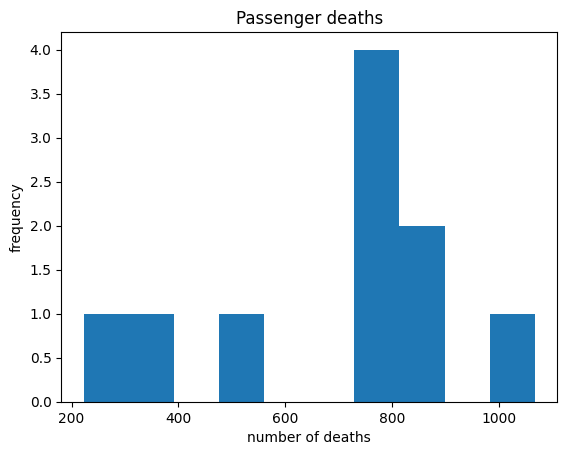

Text(0, 0.5, 'frequency')

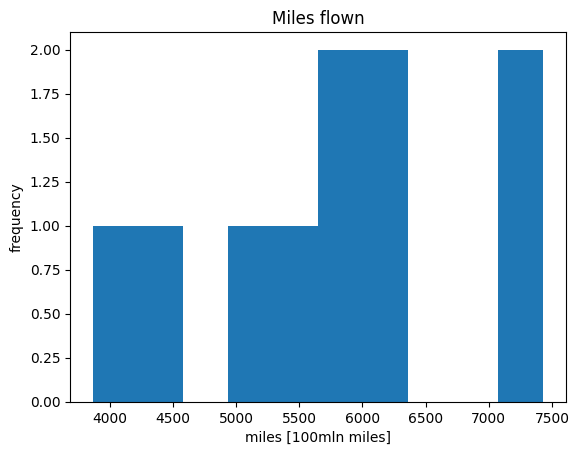

In [26]:

plt.hist(df['Fatal accidents'])
plt.title('Fatal accidents')
plt.xlabel('number of accidents')
plt.ylabel('frequency')
plt.show()

plt.hist(df['Passenger deaths'])
plt.title('Passenger deaths')
plt.xlabel('number of deaths')
plt.ylabel('frequency')
plt.show()

plt.hist(df['Miles flown [100 mln miles]'])
plt.title('Miles flown')
plt.xlabel('miles [100mln miles]')
plt.ylabel('frequency')


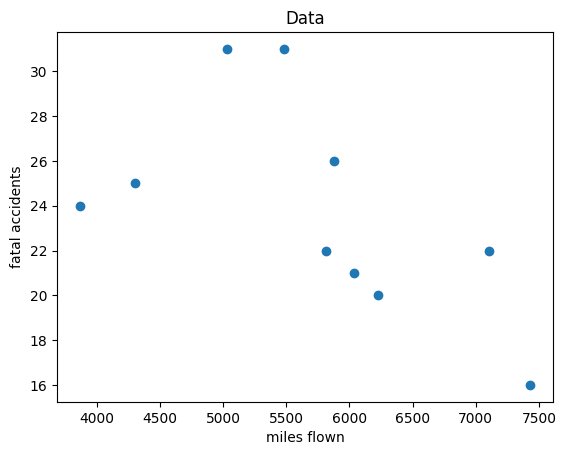

In [27]:
plt.scatter(df["Miles flown [100 mln miles]"], df["Fatal accidents"])
plt.title('Data')
plt.ylabel("fatal accidents")
plt.xlabel("miles flown")
plt.show()


In [28]:
model_ppc = CmdStanModel(stan_file='prior.stan')

data = {
    'N': df.shape[0],  
    'miles': df['Miles flown [100 mln miles]'].values.tolist()  
}

R = 1000

sim_ppc = model_ppc.sample(
    data=data,
    iter_sampling=R,
    iter_warmup=1,
    chains=1,
    refresh=R,
    fixed_param=True,
    seed=123456,
    output_dir='samples'  
)



20:39:55 - cmdstanpy - INFO - CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


20:39:55 - cmdstanpy - INFO - CmdStan done processing.
20:39:55 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: poisson_log_rng: Log rate parameter is -nan, but must be finite! (in 'prior.stan', line 12, column 1 to column 63)
	Exception: poisson_log_rng: Log rate parameter is -nan, but must be finite! (in 'prior.stan', line 12, column 1 to column 63)
	Exception: poisson_log_rng: Log rate parameter is -nan, but must be finite! (in 'prior.stan', line 12, column 1 to column 63)
	Exception: poisson_log_rng: Log rate parameter is -nan, but must be finite! (in 'prior.stan', line 12, column 1 to column 63)
	Exception: poisson_log_rng: Log rate parameter is -nan, but must be finite! (in 'prior.stan', line 12, column 1 to column 63)
	Exception: poisson_log_rng: Log rate parameter is -nan, but must be finite! (in 'prior.stan', line 12, column 1 to column 63)
	Exception: poisson_log_rng: Log rate parameter is -nan, but must be finite! (in 'prior.stan', line 12, column 1 to c

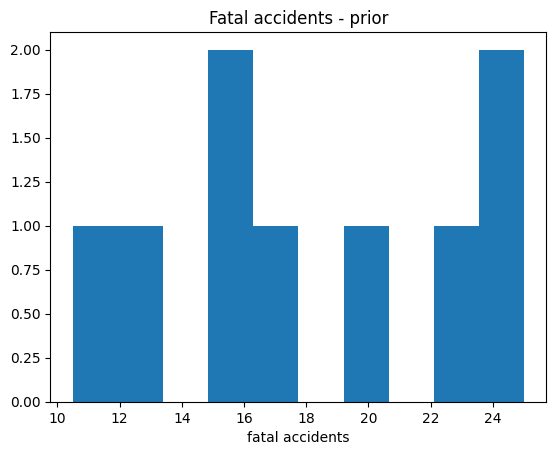

In [29]:
accidents = sim_ppc.stan_variable("accidents")
accidents_mean = [np.mean(accidents[:][n]) for n in range(len(df))]
plt.hist(accidents_mean)
plt.title("Fatal accidents - prior")
plt.xlabel("fatal accidents")
plt.show()


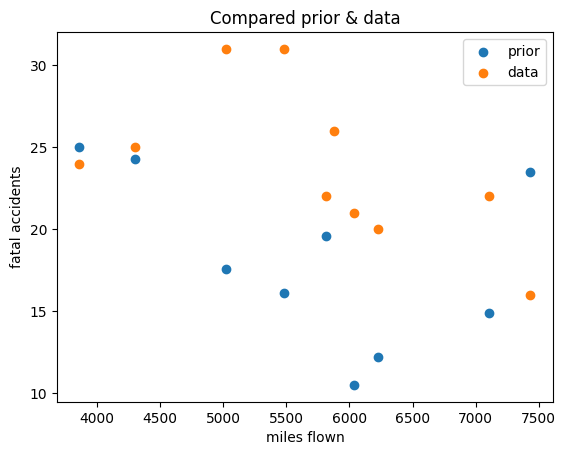

In [30]:
plt.scatter(df["Miles flown [100 mln miles]"],accidents_mean, label="prior")
plt.scatter(df["Miles flown [100 mln miles]"],df["Fatal accidents"], label="data")
plt.title("Compared prior & data")
plt.ylabel("fatal accidents")
plt.xlabel("miles flown")
plt.legend()
plt.show()


In [31]:
df = pd.read_csv('Airline_data.csv', index_col=0)

N = len(df)

print("Wartość N:", N)

Wartość N: 10


In [41]:
model_fit = CmdStanModel(stan_file='/root/lab5/model1.stan')
fit = model_fit.sample(
data=data
) 



20:48:30 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)


chain 1 |██████████| 00:00 Sampling completed                       
chain 2 |██████████| 00:00 Sampling completed                     
chain 3 |██████████| 00:00 Sampling completed                       
chain 4 |██████████| 00:00 Sampling completed                       


20:48:30 - cmdstanpy - INFO - CmdStan done processing.
20:48:30 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model1.stan', line 15, column 1 to column 59)
	Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model1.stan', line 15, column 1 to column 59)
	Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model1.stan', line 15, column 1 to column 59)
	Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model1.stan', line 15, column 1 to column 59)
	Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model1.stan', line 15, column 1 to column 59)
	Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model1.stan', line 15, column 1 to column 59)
	Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model1.stan', l

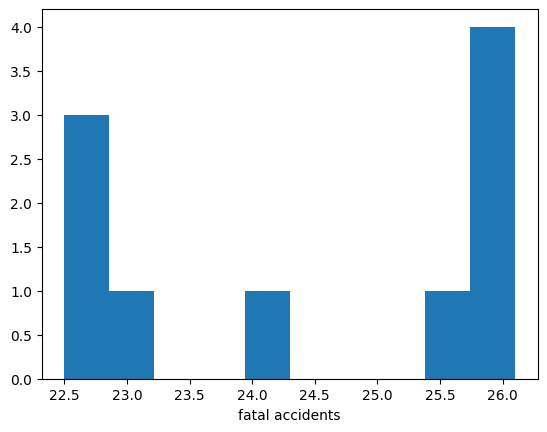

In [39]:
accidents = fit.stan_variable("pred_acc")
accidents_mean = [np.mean(accidents[:][n]) for n in range(len(df))]
plt.hist(accidents_mean)
plt.xlabel("fatal accidents")
plt.show()

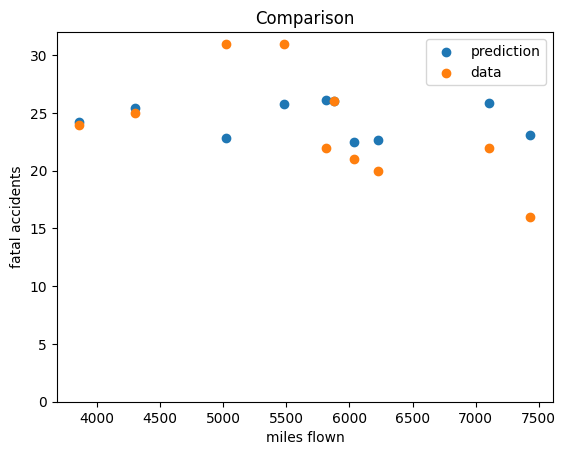

In [42]:
plt.scatter(df["Miles flown [100 mln miles]"], accidents_mean, label="prediction")
plt.scatter(df["Miles flown [100 mln miles]"], df["Fatal accidents"], label="data")
plt.title("Comparison")
plt.ylabel("fatal accidents")
plt.xlabel("miles flown")
plt.legend()
plt.ylim([0, 32])
plt.show()


In [43]:
model_fit = CmdStanModel(stan_file='model2.stan')
fit = model_fit.sample(data=data)

20:51:35 - cmdstanpy - INFO - compiling stan file /root/lab5/model2.stan to exe file /root/lab5/model2
20:52:25 - cmdstanpy - INFO - compiled model executable: /root/lab5/model2
20:52:25 - cmdstanpy - INFO - CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |▉         | 00:00 Iteration:    1 / 2000 [  0%]  (Warmup)



chain 1 |█▎        | 00:00 Iteration:  100 / 2000 [  5%]  (Warmup)


chain 1 |██▎       | 00:00 Iteration:  300 / 2000 [ 15%]  (Warmup)


chain 1 |████      | 00:00 Iteration:  700 / 2000 [ 35%]  (Warmup)


chain 1 |██████▊   | 00:01 Iteration: 1200 / 2000 [ 60%]  (Sampling)


chain 1 |████████▏ | 00:01 Iteration: 1500 / 2000 [ 75%]  (Sampling)

chain 1 |██████████| 00:01 Iteration: 1900 / 2000 [ 95%]  (Sampling)


chain 1 |██████████| 00:01 Sampling completed                       
chain 2 |██████████| 00:01 Sampling completed                       
chain 3 |██████████| 00:01 Sampling completed                       
chain 4 |██████████| 00:01 Sampling


20:52:27 - cmdstanpy - INFO - CmdStan done processing.
20:52:27 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model2.stan', line 16, column 1 to column 62)
	Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model2.stan', line 16, column 1 to column 62)
	Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model2.stan', line 16, column 1 to column 62)
	Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model2.stan', line 16, column 1 to column 62)
	Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model2.stan', line 16, column 1 to column 62)
	Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model2.stan', line 16, column 1 to column 62)
	Exception: poisson_log_lpmf: Log rate parameter is -nan, but must be not nan! (in 'model2.stan', l

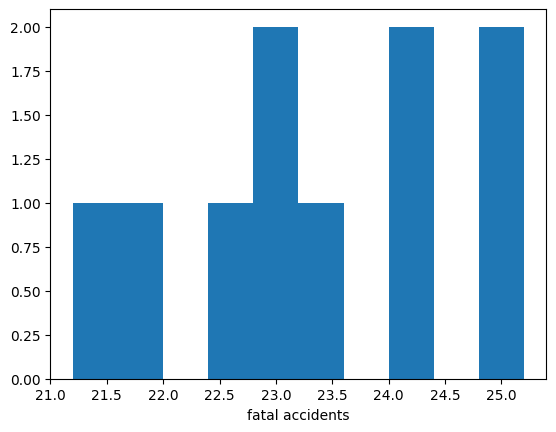

In [44]:
accidents = fit.stan_variable("pred_acc")
accidents_mean = [np.mean(accidents[:][n]) for n in range(len(df))]
plt.hist(accidents_mean)
plt.xlabel("fatal accidents")
plt.show()


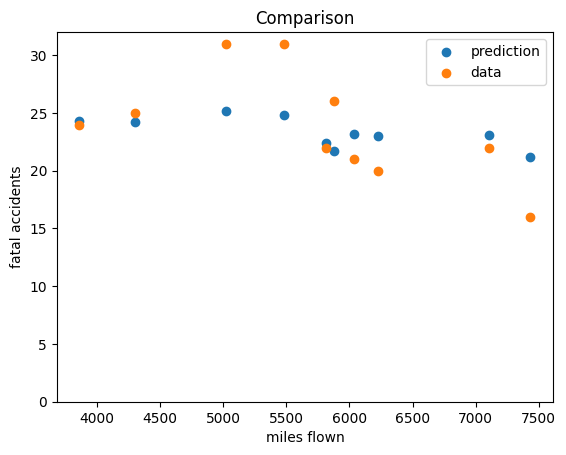

In [45]:
plt.scatter(df["Miles flown [100 mln miles]"], accidents_mean, label="prediction")
plt.scatter(df["Miles flown [100 mln miles]"], df["Fatal accidents"], label="data")
plt.title("Comparison")
plt.ylabel("fatal accidents")
plt.xlabel("miles flown")
plt.legend()
plt.ylim([0, 32])
plt.show()
